In [1]:
# %matplotlib_svg
# 為了在 Notebook 的多個儲存格內操作同一幅圖表，需要執行的魔法指令
%config InlineBackend.close_figures = False 

import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/scpy2/")))

In [37]:
from IPython.core.magic import register_line_magic

@register_line_magic
def dot(line):
    from IPython.core.getipython import get_ipython
    from fnmatch import fnmatch

    import pydotplus as pdp
    from IPython.display import display, Image

    line = line.strip()
    data = eval(line)

    graph = pdp.graph_from_dot_data(data)
    display(Image(graph.create_png()))

## Artist物件

matplotlib 是一套物件導向的繪圖函數庫，它有三個層次：
- `backend_bases.FigureCanvas`：繪圖用的畫布。
- `backend_bases.Renderer`：知道如何在 `FigureCanvas` 物件上繪圖。
- `artist.Artist`：知道如何使用 `Renderer` 在 `FigureCanvas` 物件上繪圖。

`FigureCanvas` 和 `Renderer` 需要處理底層的繪圖操作，例如 wxPython 介面函數庫所產生的介面上繪圖，或使用 `PostScript` 在 PDF 檔案中繪圖。

`Artist` 物件則處理所有的高層結構，例如處理圖表、文字和曲線等各種繪畫素的繪製和版面配置。通常我們只和 `Artist` 物件進行處理，而不需要關心底層是如何實現繪圖細節的。

`Artist` 物件分為 `簡單類型` 和 `容器類型` 兩種。
- 簡單類型 的 `Artist` 物件是標準的繪畫素件，例如 Line2D, Rectangle, Text, AxesImage等。
- 容器類型 則可以包含多個 `Artist` 物件，使它們組織成一個整體，例如 Axis, Axes, Figure等。

直接建立 `Artist` 物件進行繪圖的流程如下：
1. 建立 `Figure` 物件。
2. 為 `Figure` 物件建立一個或多個 `Axes` 物件。
3. 呼叫 `Axes` 物件的方法來建立各種簡單類型的 `Artist` 物件。

在下面的程式中，
- 首先呼叫 `figure()` 建立 `Figure` 物件，`figure()` 是一個輔助函數，幫助我們建立 `Figure` 物件，它會進行許多初始化操作，因此不建議直接使用 `Figure()` 建立。
- 然後呼叫 `Figure` 物件的 `add_axes()` 在其中建之一個 `Axes` 物件，`add_axes()` 的參數是一個形如 `[left, bottom, width, height]` 的列表，這些數值分別指定所建立的 `Axes` 物件在 `Figure` 物件中的位置和大小，各個值的設定值範圍都在 0 到 1 之間。

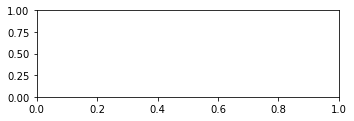

In [4]:
#%nofig
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

然後呼叫 `Axes` 物件的 `plot()` 來繪製曲線，並且傳回表示此曲線的 Line2D 物件。

In [5]:
line = ax.plot([1, 2, 3], [1, 2, 1])[0]  # 傳回的是只有一個元素的清單
print( line is ax.lines[0] )

True


`Axes` 物件的 `lines` 屬性是一個包含所有曲線的清單，如果繼續執行 `ax.plot()` ，所建立的 Line2D 物件都會增加到此清單中。如果想刪除某條曲線，直接從此清單中刪除即可。

`Axes` 物件還包含許多其他的 `Artist` 物件，例如可以透過 `set_xlabel()` 設定其 X 軸上的標題：

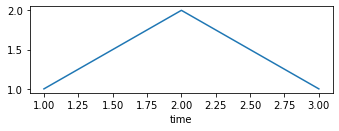

In [6]:
ax.set_xlabel("time");
plt.show()

如果檢視 `set_xlabel()` 的原始程式碼，就會發現它是透過下面的敘述實現的：

```
self.xaxis.set_label_text(xlabel)
```

如果一直追蹤下去，就會發現 `Axes` 物件的 `xaxis` 屬性是一個 `XAxis` 物件，其 `label` 屬性是一個 `Text` 物件，而 `Text` 物件的 `_text` 屬性為我們設定的值：

In [7]:
print( ax.xaxis )
print( ax.xaxis.label )
print( ax.xaxis.label._text )

XAxis(64.8,28.8)
Text(0.5, 7.800000000000001, 'time')
time


`Axes`, `XAxis`, `Text` 類別都從 `Artist` 繼承，也可以呼叫它們的 `get_*()` 以獲得對應的屬性值：

In [8]:
ax.get_xaxis().get_label().get_text()

'time'

### Artist的屬性

圖表中的每個繪畫素都用一個 `Artist` 物件表示，而每個 `Artist` 物件都有許多屬性控制其顯示效果。例如 `Figure` 物件 和 `Axes` 物件都有 `patch`屬性作為其背景，它是一個 `Rectangle` 物件。透過設定它的屬性可以修改圖表的背景顏色或透明度，下面的實例將圖表的背景顏色設定為綠色：

In [9]:
plt.close('all')
#%hide_output
fig = plt.figure()
fig.patch.set_color("g") # 設定背景彩色為綠色

<Figure size 432x288 with 0 Axes>

注意當程式作為單獨程式執行時期，呼叫 `set_color()` 設定好背景顏色之後，並不會立即在介面上顯示出來，還需要呼叫 `fig.canvas.draw()` 才能更新介面顯示：

表4-1 所有 `Artist` 物件都擁有的一些屬性
|屬性 |說明 |
|-----|-----|
|alpha |透明度，值在 0 到 1 之間，0 為完全透明，1 為完全不透明。 |
|animated |布林值，在繪製動畫效果時使用。 |
|axes |擁有此 `Artist` 物件的 `Axes` 物件，可能為 `None`。 |
|clip_box |物件的修改框 |
|clip_on |是否修改 |
|clip_path |修改的路徑 |
|contains |判斷指定點是否在物件之上的函數 |
|figure |擁有此 `Artist` 物件的 `Figure` 物件，可能為 `None` |
|label |文字標籤 |
|picker |控制 `Artist` 物件選取 |
|transform |控制偏移、旋轉、縮放等座標轉換 |
|visible |控制是否可見 |
|zorder |控制繪圖可見 |

`Artist` 物件的所有屬性都可以透過對應的 `get_*()` 和 `set_*()` 方法進行讀寫，例如下面的敘述將新繪製的曲線物件的 `alpha` 屬性設定 0.5，使它變成半透明。

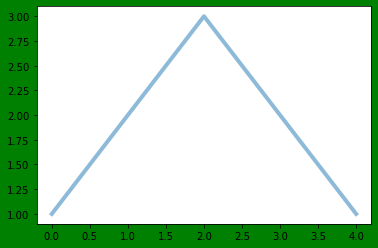

In [10]:
#%nofig
line = plt.plot([1, 2, 3, 2, 1], lw=4)[0]
line.set_alpha(0.5)
plt.show()

可以使用 `set()` 一次設定多個屬性：

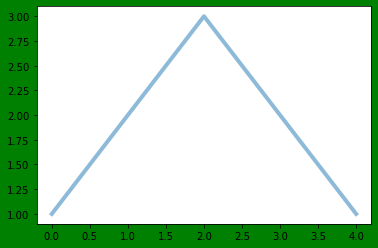

In [11]:
line.set(alpha=0.5, zorder=2);
plt.show()

使用前面介紹的 `getp()` 可以方便地輸出 `Artist` 物件的所有屬性名稱以及與之對應的值：

In [12]:
# %omit plt.getp(fig.patch)
plt.getp(fig.patch)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (0.0, 0.5, 0.0, 1.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (0.0, 0.5, 0.0, 1.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTra...
    transfo

In [13]:
#%hide
plt.close("all")

### Figure容器

接下來要解決的問題是如何找到指定的 `Artist` 物件。前面介紹過 `Artist` 物件有 容器類型 和 簡單類型 兩種，這一節將詳細看看容器類型。

在組成圖表的各種 `Artist` 物件中，最上層的 `Artist` 物件是 `Figure` ，它包含組成圖表的所有元素。當呼叫 `add_subplot()` 或 `add_axes()` 方法往圖表中增加子圖時，這些子圖都將增加到 `axes` 屬性清單中，同時這兩個方法也傳回新建立的 `Axes` 物件。

注意 `add_subplot()` 和 `add_axes()` 所傳回物件的類型有所不同，分別為 `AxesSubplot` 和 `Axes` ，`AxesSubplot` 是 `Axes` 的衍生類別。

True


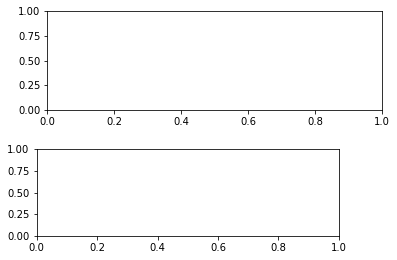

In [14]:
#%nofig
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
print( ax1 in fig.axes and ax2 in fig.axes )

為了支援 `gca()` 函數，`Figure` 物件內部儲存有當前軸的資訊，因此不建議直接對 `axes` 屬性進行清單操作，而應該使用 `add_subplot()`, `add_axes()`, `delaxes()`等方法進行子圖的增加和刪除操作。但是使用 `for` 循環對 `axes` 屬性中的每個元素操作是沒有問題的，下面的敘述開啟所有子圖的光柵顯示。

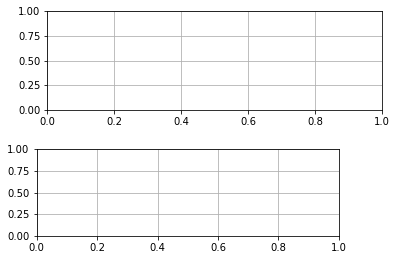

In [15]:
for ax in fig.axes:
    ax.grid(True)

plt.show()

`Figure` 物件可以擁有自己的文字、線條以及影像等簡單類型的 `Artist` 物件。預設的座標系統以像素點為單位，但是可以透過設定 `Artist` 物件的 `transform` 屬性修改其所使用的座標系。例如 `Figure` 物件的座標系是以圖表的左下角為座標原點`(0,0)`，右上角的座標為`(1,1)` ，關於座標轉換在後面的章節還會進行詳細介紹。下面的程式建立一個 `Figure` 物件，並在其中增加兩條直線：

In [16]:
#%hide
plt.close("all")

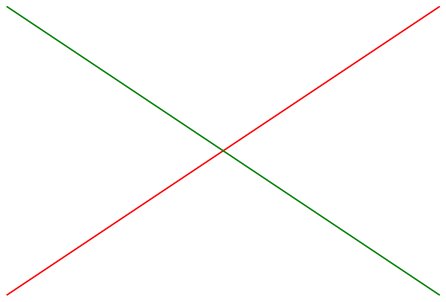

In [17]:
#%hide_output
from matplotlib.lines import Line2D
fig = plt.figure()
line1 = Line2D(
    [0, 1], [0, 1], transform=fig.transFigure, figure=fig, color="r")
line2 = Line2D(
    [0, 1], [1, 0], transform=fig.transFigure, figure=fig, color="g")
fig.lines.extend([line1, line2])

為了讓所建立的 Line2D 物件使用 `Figure` 物件的座標系，我們將 `Figure` 物件的 `transFigure` 屬性指定為 Line2D 物件的 `transform` 屬性。為了讓 Line2D 物件知道它是在 `Figure` 物件中，還設定其 `figure` 屬性為 `fig` 。最後還需要將這兩個 Line2D 物件增加到 `Figure` 物件的 `lines` 屬性清單中。

### Axes容器

`Axes容器(子圖)` 是整個 matplotlib 的核心，它包含了組成圖表的許多 `Artist物件`，並且有許多方法函數幫助我們建立和修改這些物件。和 `Figure容器` 一樣，它有一個 `patch屬性` 作為背景，當它是 笛卡爾座標時，`patch屬性` 是一個 `Rectangle物件`；而當它是極座標時，`patch屬性` 則是 `Circle物件`。例如下面的敘述將 `Axes物件` 的背景顏色設定為綠色：

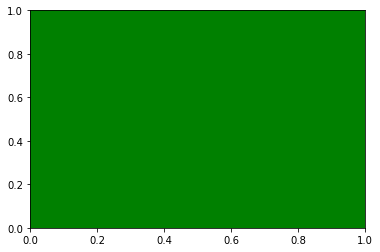

In [18]:
#%nofig
fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor("green")

當呼叫 `Axes物件` 的繪圖方法 `plot()` 時，它將建立一組 `Line2D物件`，並將它們增加進 `Axes物件` 的 `lines屬性` 中，最後傳回包含所有建立的 `Line2D物件` 的列表。`plot()` 的所有關鍵字參數都將傳遞給這些 `Line2D物件` 以設定它們的屬性：

In [19]:
x, y = np.random.rand(2, 100)
line = ax.plot(x, y, "-", color="blue", linewidth=2)[0]
line is ax.lines[0]

True

注意 `plot()` 傳回的是一個 `Line2D物件列表`，因為可以傳遞多組 X-Y 軸的資料給 `plot()` ，同時繪製多條曲線。

與 `plot()` 類似，繪製柱狀圖的函數 `bar()` 和繪製直方統計圖的函數 `hist()` 將建立一個 `Patch物件` 的清單，每個元素實際上都是從 `Patch類別` 衍生的 `Rectangle物件`，所建立的 `Patch物件` 都被增加進了 `Axes物件` 的 `patches屬性` 中：

True

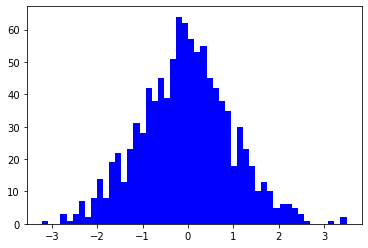

In [20]:
#%nofig
fig, ax = plt.subplots()
n, bins, rects = ax.hist(np.random.randn(1000), 50, facecolor="blue")
rects[0] is ax.patches[0]

一般我們不會直接對 `lines` 或 `patches` 屬性操作，而是呼叫 `add_line()` 或 `add_patch()` 等方法，這些方法幫助我們完成許多屬性的設定工作。下面首先建立 `Axes物件` ax 和 `Rectangle物件` rect：

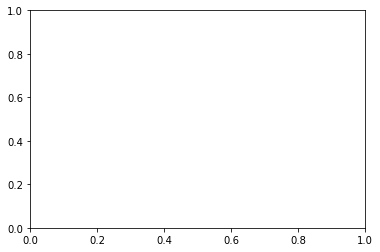

In [21]:
#%nofig
fig, ax = plt.subplots()
rect = plt.Rectangle((1,1), width=5, height=12)

然後透過 `add_patch()` 將 `rect` 增加進 ax 中：

In [22]:
ax.add_patch(rect) # 將rect加入進ax
# rect.get_axes() is ax     # .get_axes()己經不支援，請改用 .axes
rect.axes is ax

True

接下來，為了完整顯示 rect ，呼叫 ax 的 `autoscale_view()` 方法讓它自動調節 X-Y 軸的顯示範圍：

In [23]:
print( ax.get_xlim() )# ax的X軸範圍為0到1，無法顯示完整的rect

(0.0, 1.0)


In [24]:
print( ax.dataLim._get_bounds() )# 資料的範圍和rect的大小一致

AttributeError: 'Bbox' object has no attribute '_get_bounds'

In [ ]:
ax.autoscale_view() # 自動調整座標軸範圍
print( ax.get_xlim() )# 於是X軸可以完整顯示rect

(0.75, 6.25)


表 4-3 包含其他 Artist 物件的 Axes 物件屬性
|屬性 |Artist物件列表 |
|----|---------------|
|artists |Artist 物件列表 |
|patch |作為 Axes 背景的 Patch 物件，可以是 Rectangle 或 Circle |
|collections |Collection 物件列表 |
|images |AxesImage 物件列表 |
|legends |Legend 物件列表 |
|lines |Line2D 物件列表 |
|patches |Patch 物件列表 |
|texts |Text 物件列表 |
|xaxis |XAxis 物件列表 |
|yaxis |YAxis 物件列表 |


表 4-4 Axes 物件提供的建立其他 Artist 物件的方法
|Axes 的方法 |所建立的物件 |增加進的列表 |
|-----------|------------|------------|
|annotate() |Annotate |texts[] |
|bars() |Rectangle |patches[] |
|errorbar() |Line2D, Rectangle |line[], patches[] |
|fill() |Polygon |patches[] |
|hist() |Rectangle |patches[] |
|imshow() |AxesImage |images[] |
|legend() |Legend |legends[] |
|plot() |Line2D |lines[] |
|scatter() |PolygonCollection |collections[] |
|text() |Text |texts[] |

列如下面的程式呼叫 `scatter()` 繪製雜湊圖，它傳回的是一個 `PathCollection物件`，該物件被增加進 `ax.collections` 列表：

<matplotlib.collections.PathCollection object at 0x0000019FB147C070> True


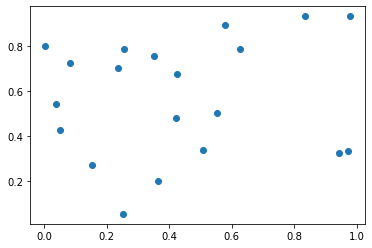

In [25]:
#%nofig
fig, ax = plt.subplots()
t = ax.scatter(np.random.rand(20), np.random.rand(20))
print( t, t in ax.collections )

### Axis容器

`Axis容器` 包含座標軸上的刻度線、刻度文字、座標網格 以及 座標軸標題 等內容。刻度包含主刻度和副刻度，分別透過 `get_major_ticks()` 和 `get_minor_ticks()` 方去獲得。每個刻度線都是一個 `XTick` 或 `YTick` 物件，它包含實際的 刻度線 和 刻度文字。為了方便存取刻度線和文字，`Axis物件` 提供了 `get_ticklabels()` 和 `get_ticklines()` 方法來直接獲得 刻度線 和 刻度文字 了。

下面先建之一個子圖並獲得其 X 軸物件 axis：

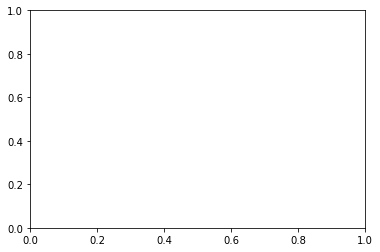

In [26]:
plt.close('all')
#%nofig
fig, ax = plt.subplots()
axis = ax.xaxis

下面獲得 `axis物件` 的刻度位置的列表：

In [27]:
axis.get_ticklocs() 

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

下面獲得 `axis物件` 的 刻度標籤 以及 標籤中的文字：

In [28]:
print( axis.get_ticklabels() )# 獲得刻度標簽清單
print( [x.get_text() for x in axis.get_ticklabels()] )# 獲得刻度的文字字串

[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]
['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']


下面獲得軸上表示主刻度線的列表，可以看到 X 軸上共有 12 條刻度線，它們是子圖的上下兩個 X 軸上的所有刻度線：

In [29]:
axis.get_ticklines() 

<a list of 12 Line2D ticklines objects>

而由於圖中沒有副刻度線，因此副刻度線列表的長度為 0：

In [30]:
axis.get_ticklines(minor=True) # 獲得副刻度線清單

<a list of 0 Line2D ticklines objects>

獲得刻度線 或 刻度標籤 之後，可以設定其各種屬性，下面設定刻度線為綠色粗線，文字為紅色並且旋轉 45度。最後結果如圖4-8所示。

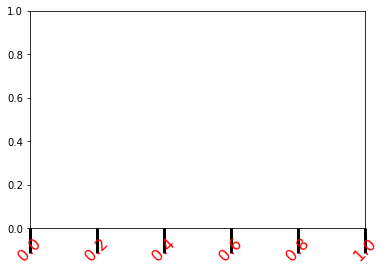

In [31]:
#%fig=組態X軸的刻度線和刻度文字的型態
for label in axis.get_ticklabels():
    label.set_color("red")
    label.set_rotation(45)
    label.set_fontsize(16)
     
for line in axis.get_ticklines():
    line.set_color("green")
    line.set_markersize(25)
    line.set_markeredgewidth(3)
# fig
plt.show()

這個實例只是為了示範 `Artist物件` 的各種屬性，實際上使用 `pyplot` 模組中的 `xticks()` 能夠更快地完成 X 軸上的刻度文字的設定。不過，`xticks()` 只能設定刻度文字的屬性，不能設定刻度線的屬性。有興趣的人可以在 IPython 中輸入 `plt.xticks??` 來檢視原始程式碼。

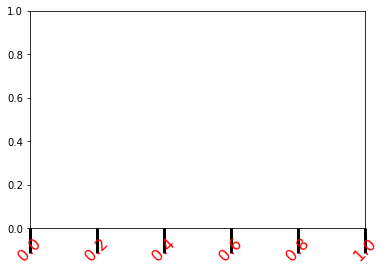

In [32]:
plt.xticks(fontsize=16, color='red', rotation=45)
plt.show()

在前面的實例中，副刻度線列表為空，這是因為用於計算副刻度位置的物件預設為 `NullLocator` ，它不產生任何刻度線。而計算主刻度位置的物件為 `AutoLocator`，它會根據目前的縮放等設定自動計算刻度的位置：

In [33]:
print( axis.get_minor_locator() )# 計算副刻度位置的物件
print( axis.get_major_locator() )# 計算主刻度位置的物件

matplotlib 提供了多種設定刻度線位置的 `Locator`類別和控制刻度文字顯示的`Formatter`類別。下面的程式設定 X 軸的主刻度為 $\pi/4$，副刻度為 $\pi/20$，並且主刻度上的文字用數學符號顯示 $\pi$。程式的輸出如圖所示。

❶ 刻度定位和文字格式化相關的類別都在 `matplotlib.ticker` 模組中定義，程式從中載入了以下兩個類別：
- `MultipleLocator`：❸❺以指定值的整數倍為刻度放置主副刻度線。
- `FuncFormatter`：❹使用指定的函數計算刻度文字，它會將刻度值和刻度的序號作為參數傳遞給計算刻度文字的函數。

❷ 程式中透過 `pi_formatter()` 計算出與刻度值對應的刻度文字。



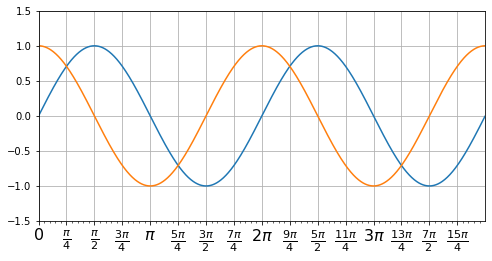

In [34]:
#%fig=組態X軸的刻度線的位置和文字，並開啟副刻度線
from fractions import Fraction
from matplotlib.ticker import MultipleLocator, FuncFormatter #❶
x = np.arange(0, 4*np.pi, 0.01)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(x, np.sin(x), x, np.cos(x))

def pi_formatter(x, pos): #❷
    frac = Fraction(int(np.round(x / (np.pi/4))), 4)
    d, n = frac.denominator, frac.numerator
    if frac == 0:
        return "0"
    elif frac == 1:
        return "$\pi$"
    elif d == 1:
        return r"${%d} \pi$" % n
    elif n == 1:
        return r"$\frac{\pi}{%d}$" % d
    return r"$\frac{%d \pi}{%d}$" % (n, d)

# 設定兩個座標軸的範圍
plt.ylim(-1.5,1.5)
plt.xlim(0, np.max(x))

# 設定圖的底邊距
plt.subplots_adjust(bottom = 0.15)

plt.grid() #開啟網格

# 主刻度為pi/4
ax.xaxis.set_major_locator( MultipleLocator(np.pi/4) ) #❸

# 主刻度文字用pi_formatter函數計算
ax.xaxis.set_major_formatter( FuncFormatter( pi_formatter ) ) #❹

# 副刻度為pi/20
ax.xaxis.set_minor_locator( MultipleLocator(np.pi/20) ) #❺

# 設定刻度文字的大小
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)

### Artist物件的關系

為了方便了解圖表中各種 `Artist` 物件之間的關係，本書提供一個輸出 `Artist`物件關係圖的小程式。

> **SOURCE**

> `scpy2.common.GraphvizMatplotlib`：將matplotlib的物件關系輸出成如`ref:fig-next`所示的關系圖。

為了產生關係圖，可以從 Graphviz 的官方網站下載 Graphviz 軟體套件，或使用 Graphviz 的線上編輯器。下面看一個實例：

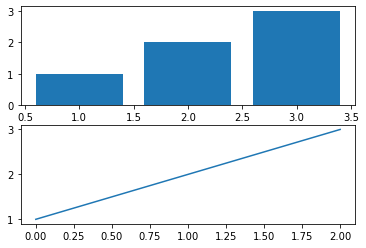

In [35]:
#%nofig
fig = plt.figure()
plt.subplot(211)
plt.bar([1, 2, 3], [1, 2, 3])
plt.subplot(212)
plt.plot([1, 2, 3]);

In [43]:
from IPython.core.magic import register_line_magic

@register_line_magic
def dot(line):
    from IPython.core.getipython import get_ipython
    from fnmatch import fnmatch

    import pydotplus as pdp
    from IPython.display import display, Image

    line = line.strip()
    data = eval(line)

    graph = pdp.graph_from_dot_data(data)
    display(Image(graph.create_png()))

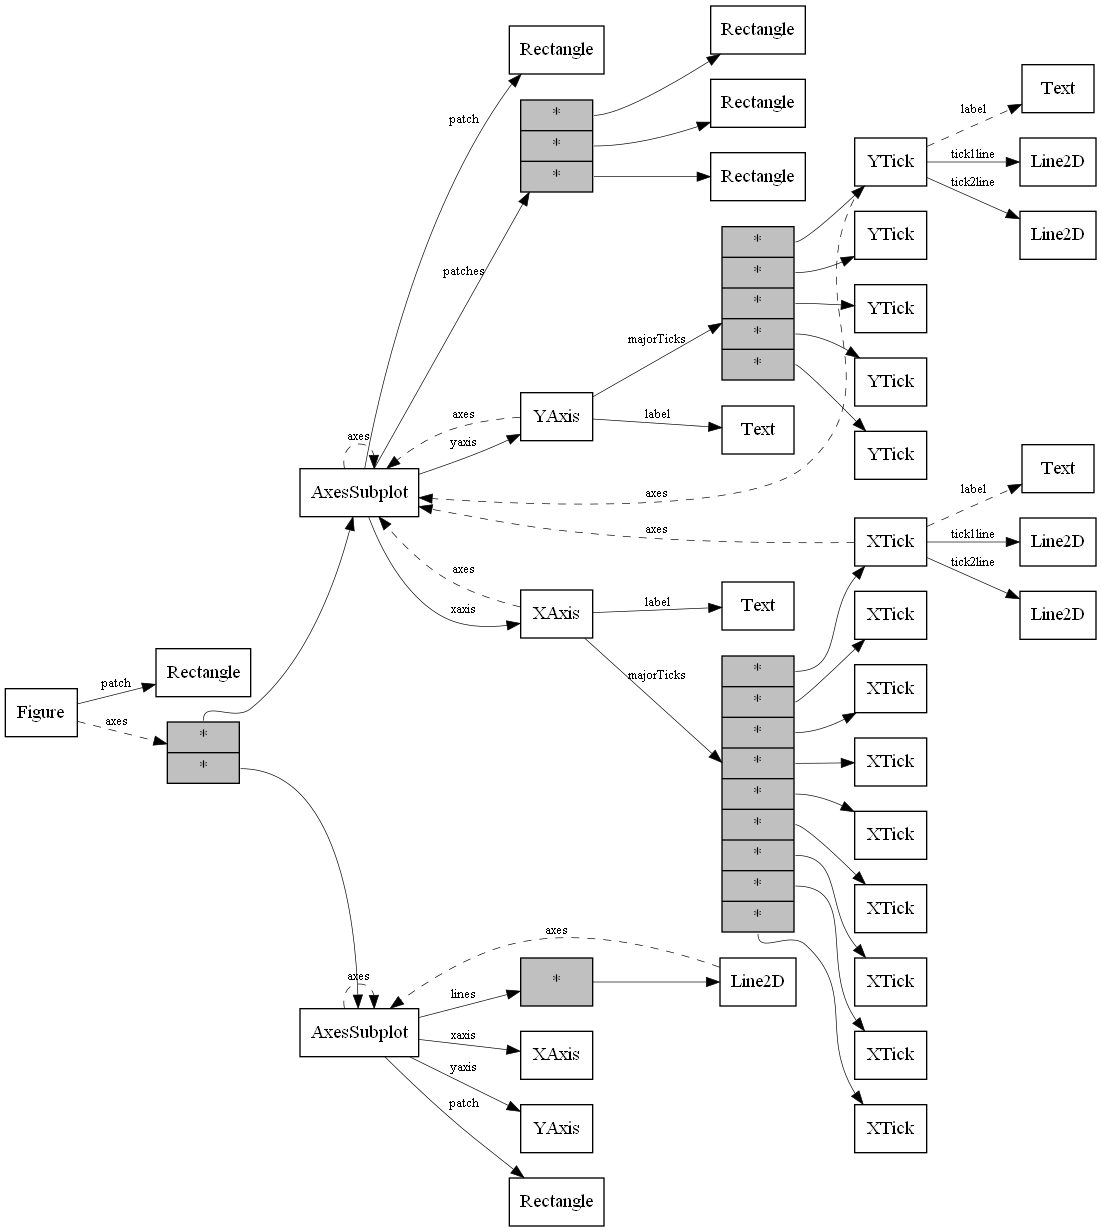

In [44]:
from scpy2.common import GraphvizMatplotlib
%dot GraphvizMatplotlib.graphviz(fig)

下面呼叫 `GraphvizMatplotlib.graphviz()` ，將 fig 內部各個 `Artist物件` 的關係輸出為 dot 程式，並使用 `%dot` 魔法指令將其轉為 SVG 影像，顯示在 Notebook中。結果為圖4-10所示的關係圖：

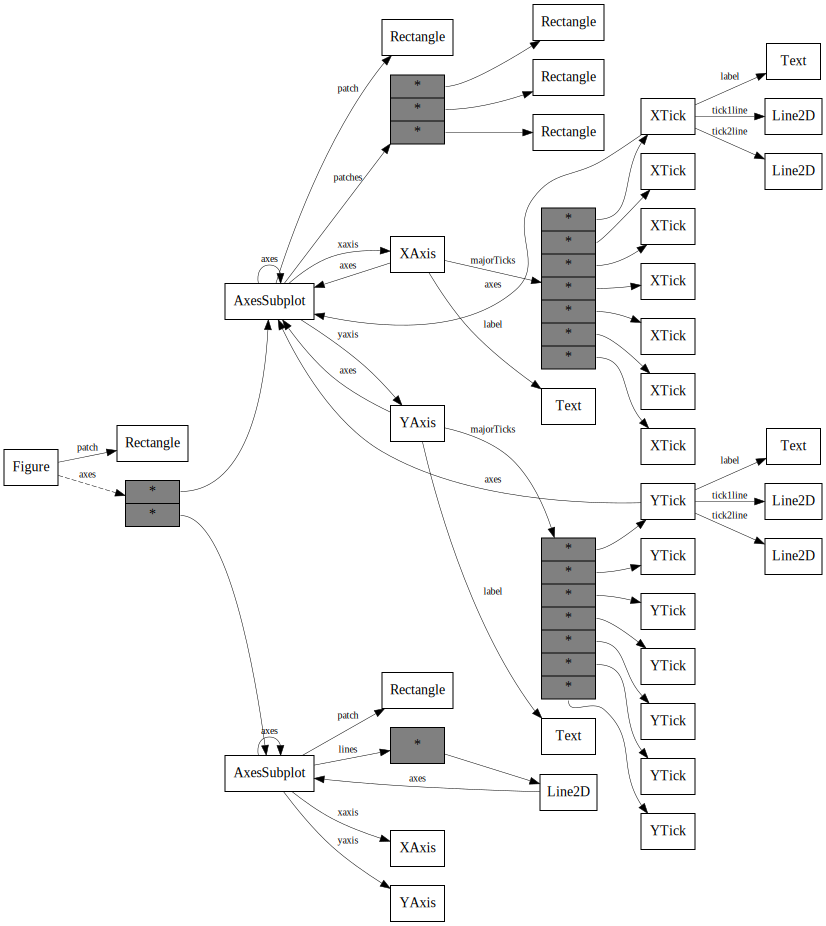

In [43]:
#%fig=使用GraphvizMatplotlib產生圖表物件中各個Artist物件之間的關系圖
from scpy2.common import GraphvizMatplotlib
%dot GraphvizMatplotlib.graphviz(fig)

圖中以 灰色填充矩形 表示 列表，其他的矩形表示各種 `Artist物件`。`Artist物件` 之間的關係使用帶箭頭的細線表示，細線旁邊的文字為屬性名稱。

例如從 `Figure矩形` 到 `Rectagnele矩形` 的箭頭表示 `Figure物件` 的 `patch屬性` 是一個 `Rectangle物件` ，而 `Figure物件` 的 `axes屬性` 是一個有兩個元素的清單，每個元素都是一個 `AxesSubplot物件`。

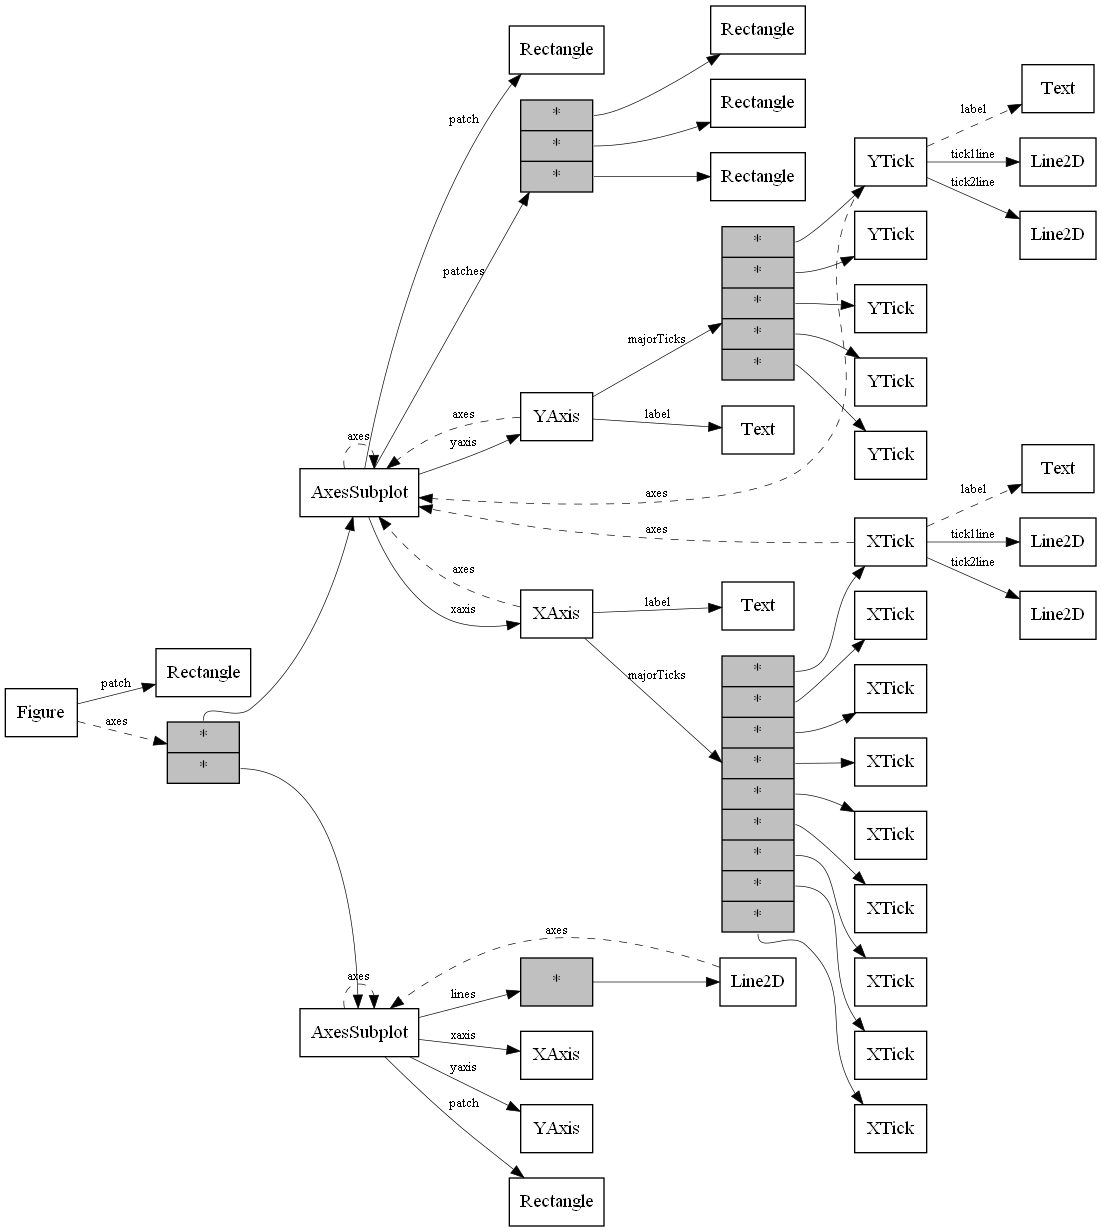

In [38]:
import pydotplus as pdp
from IPython.display import display, Image
graph = pdp.graph_from_dot_data(GraphvizMatplotlib.graphviz(fig))
display(Image(graph.create_png()))